### Titanic

In [1]:
# Importaciones clasicas
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from lazypredict.Supervised import LazyClassifier

# Visualizacion de datos perdidos o NaN
import missingno as msngo

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier
import xgboost as xgb


labelencoder = LabelEncoder()

# Tratamiento de warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de sets de datos
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
data_submission = pd.read_csv('datasets/gender_submission.csv')

In [3]:
data_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [4]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


In [5]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S


In [6]:
# Visualizacion de datos para entrenamiento
train_data.sample(5, random_state = 158)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.73,NaN,Q
883,884,0,2,"Banfield, Mr. Frederick James",male,28.00,0,0,C.A./SOTON 34068,10.50,NaN,S
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.55,C124,S
325,326,1,1,"Young, Miss. Marie Grice",female,36.00,0,0,PC 17760,135.63,C32,C
419,420,0,3,"Van Impe, Miss. Catharina",female,10.00,0,2,345773,24.15,NaN,S


In [7]:
# Visualizacion de datos para testeo
test_data.sample(5, random_state = 158)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
229,1121,2,"Hocking, Mr. Samuel James Metcalfe",male,36.00,0,0,242963,13.00,NaN,S
361,1253,2,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.00,1,1,S.C./PARIS 2079,37.00,NaN,C
161,1053,3,"Touma, Master. Georges Youssef",male,7.00,1,1,2650,15.25,NaN,C
25,917,3,"Robins, Mr. Alexander A",male,50.00,1,0,A/5. 3337,14.50,NaN,S
159,1051,3,"Peacock, Mrs. Benjamin (Edith Nile)",female,26.00,0,2,SOTON/O.Q. 3101315,13.78,NaN,S


In [8]:
# Tipos de datos
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# Visualizaciond e columnas con datos nulos
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

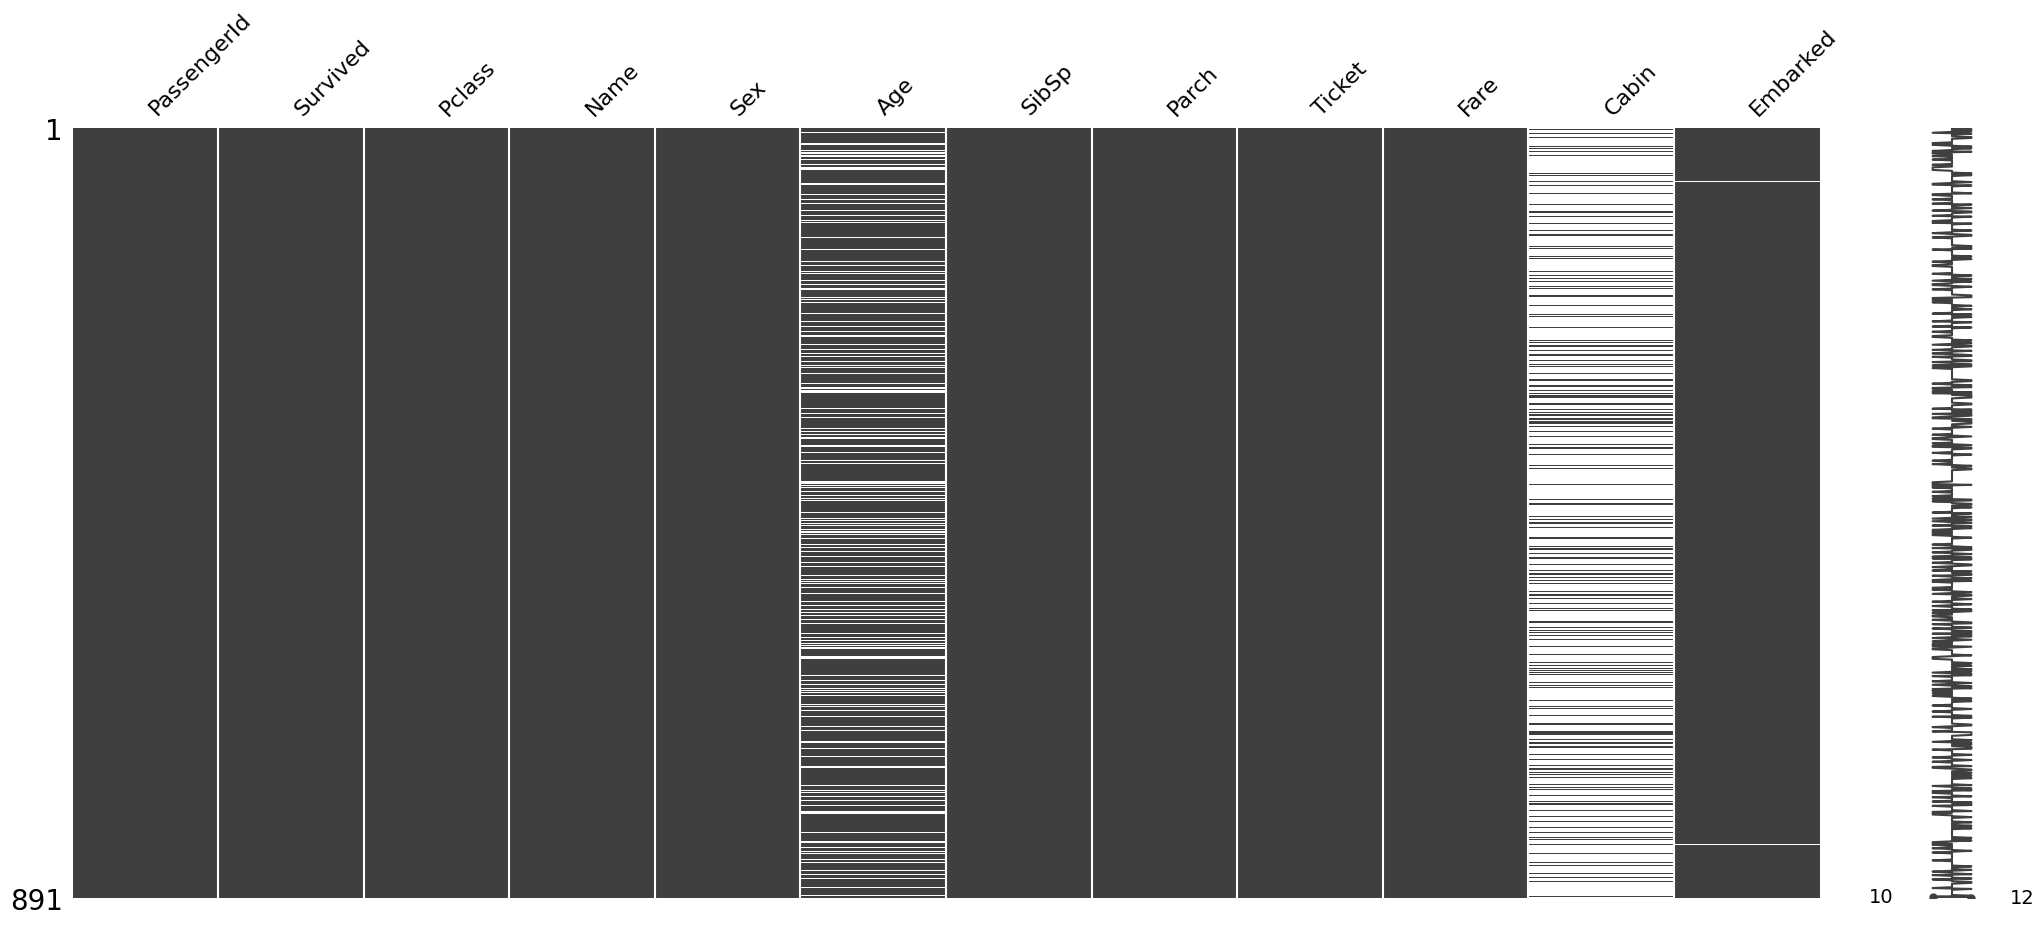

In [10]:
# Matris grafica de datos nulos
msngo.matrix(train_data)

<Axes: >

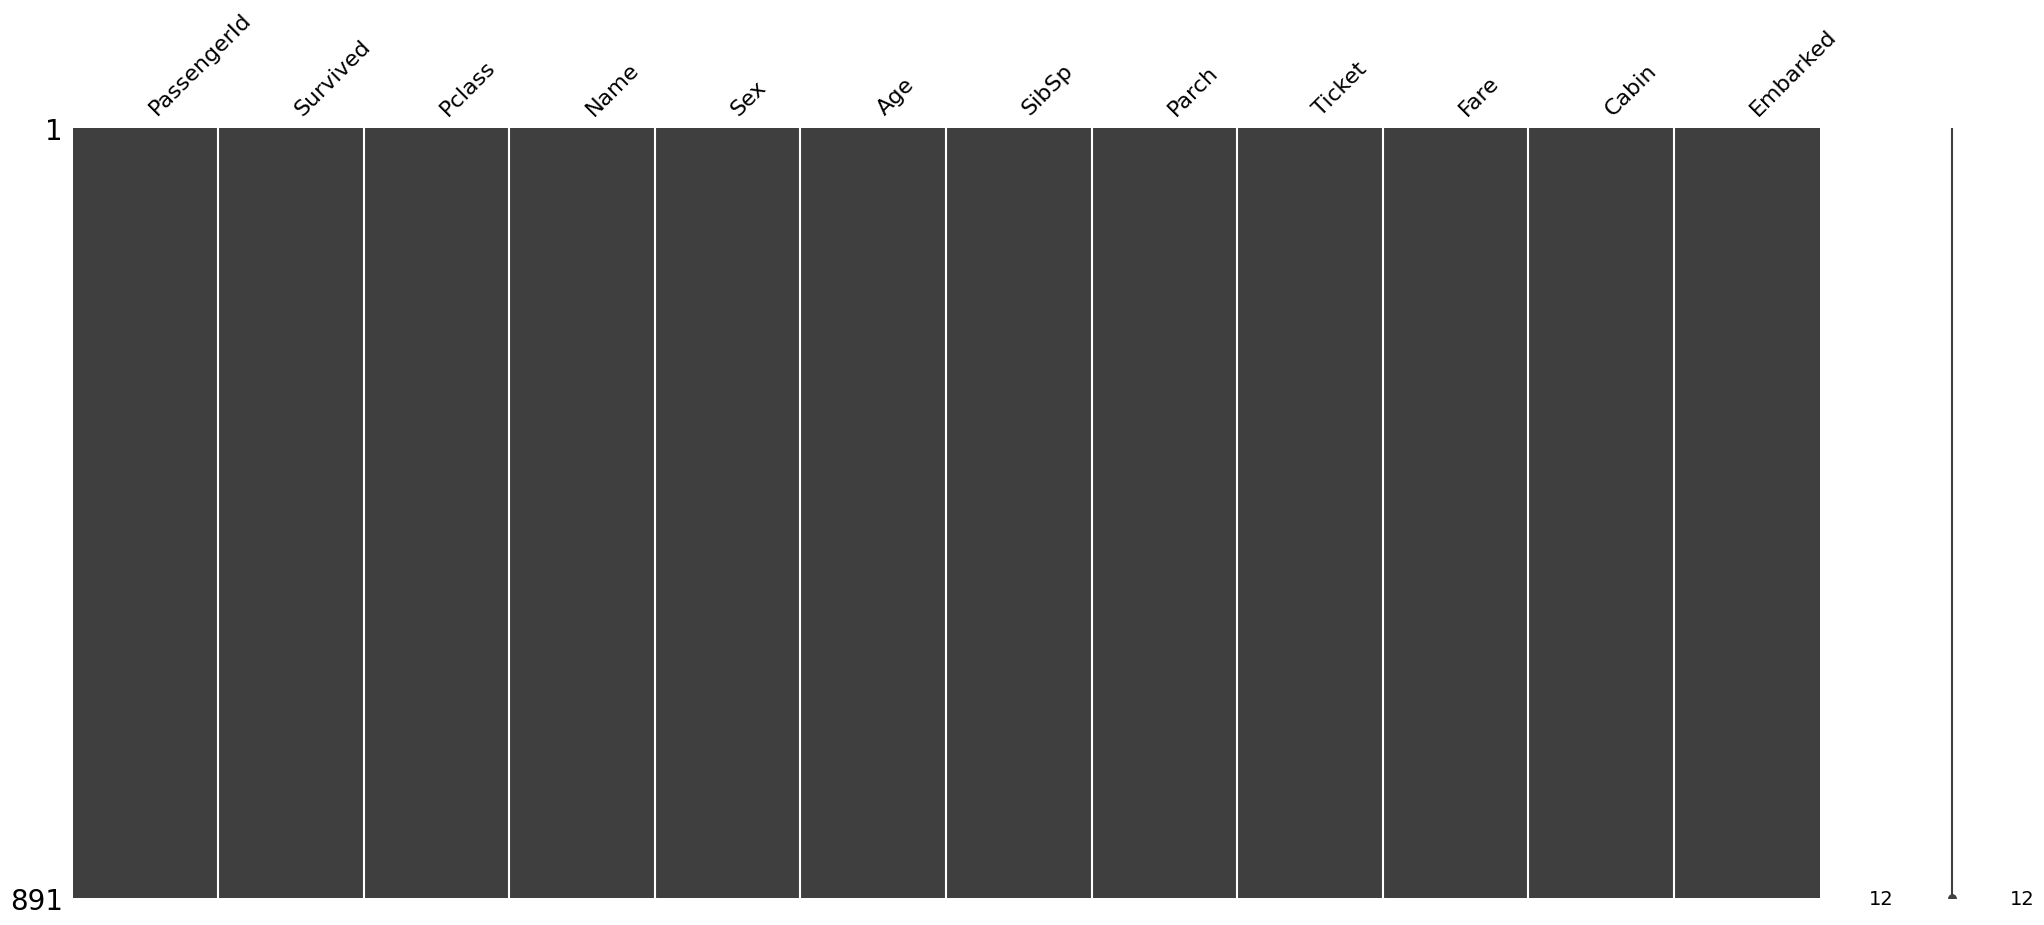

In [11]:
#Tratamiento de NaN, se transforman todos los NaN a 0
train_data["Age"] = train_data["Age"].fillna(0)
train_data["Cabin"] = train_data["Cabin"].fillna(0)
train_data["Embarked"] = train_data["Embarked"].fillna(0)
train_data["Fare"] = train_data["Fare"].fillna(0)


test_data["Age"] = test_data["Age"].fillna(0)
test_data["Cabin"] = test_data["Cabin"].fillna(0)
test_data["Embarked"] = test_data["Embarked"].fillna(0)
test_data["Fare"] = test_data["Fare"].fillna(0)

msngo.matrix(train_data)

<Axes: >

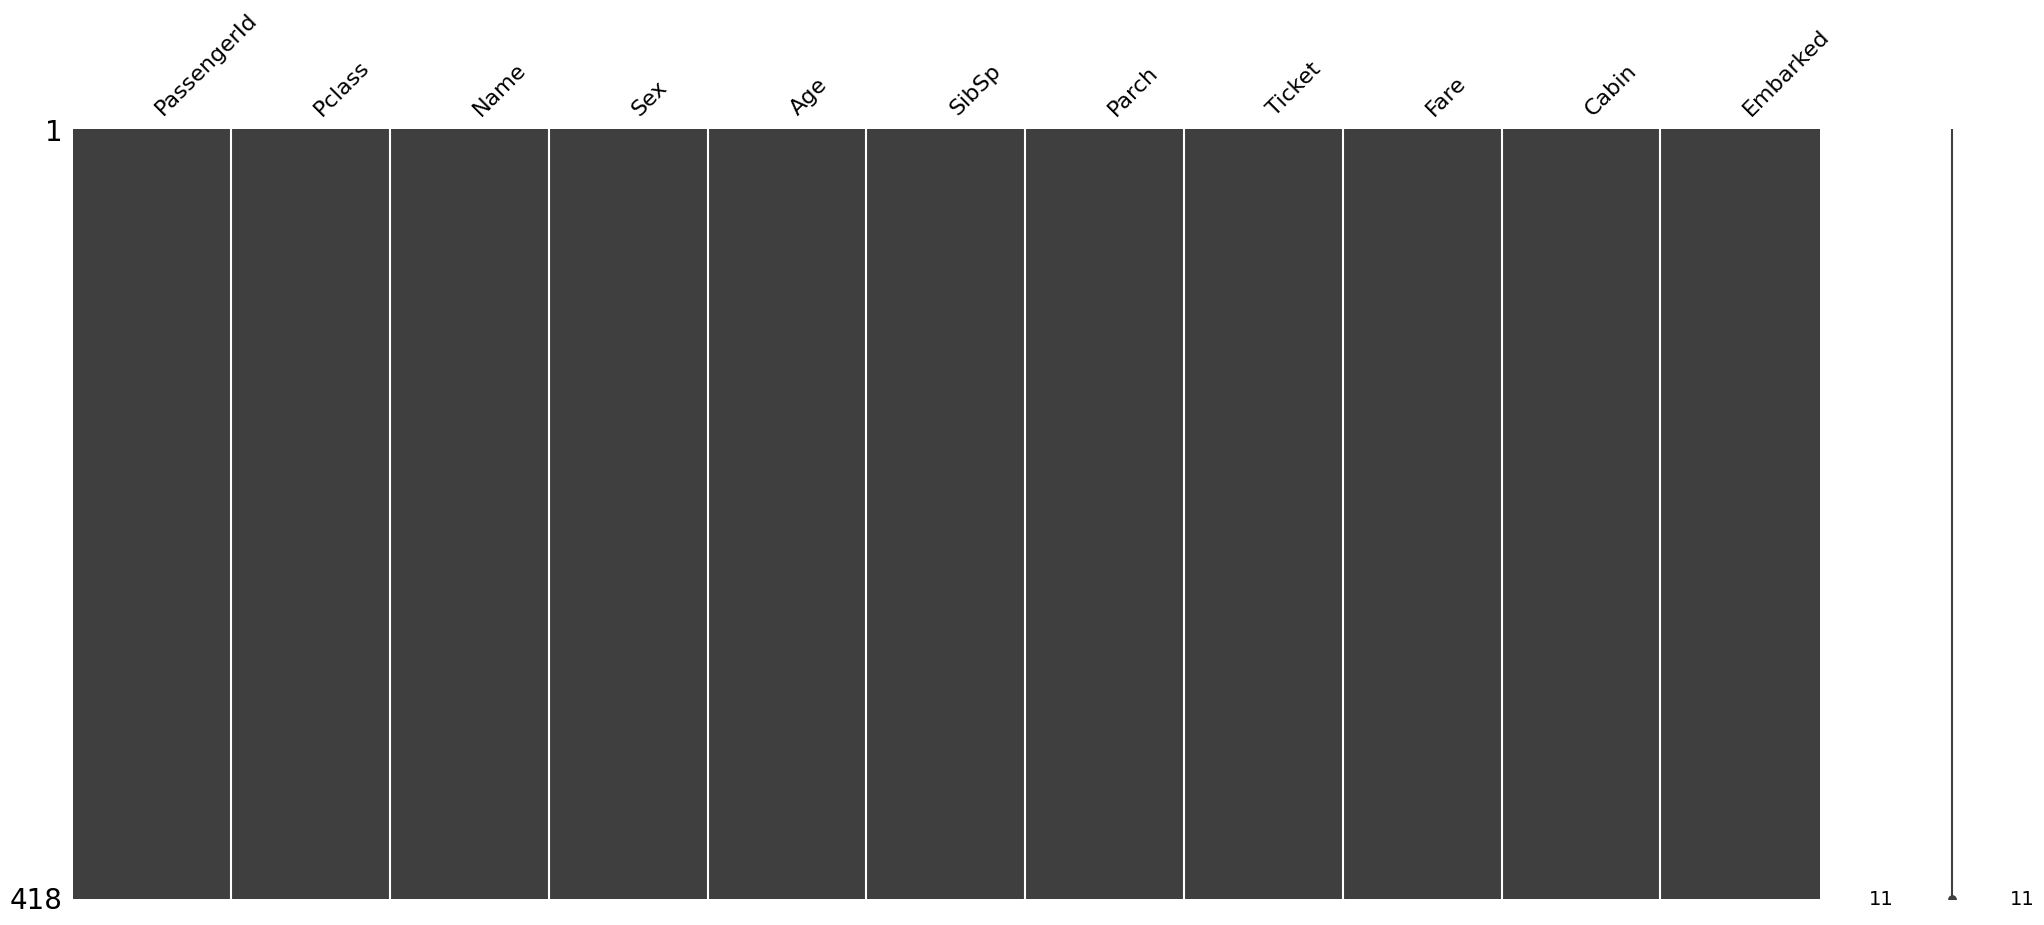

In [12]:
msngo.matrix(test_data)

In [13]:
# Visualizacion de dataset, se deben preparar dataset para modelamiento
train_data.sample(5, random_state = 158)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,0.00,0,0,35852,7.73,0,Q
883,884,0,2,"Banfield, Mr. Frederick James",male,28.00,0,0,C.A./SOTON 34068,10.50,0,S
711,712,0,1,"Klaber, Mr. Herman",male,0.00,0,0,113028,26.55,C124,S
325,326,1,1,"Young, Miss. Marie Grice",female,36.00,0,0,PC 17760,135.63,C32,C
419,420,0,3,"Van Impe, Miss. Catharina",female,10.00,0,2,345773,24.15,0,S


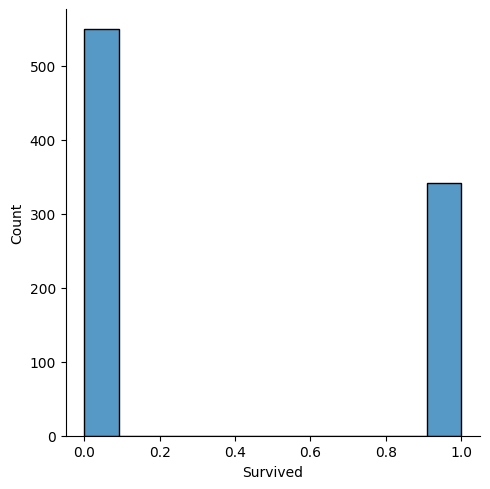

In [14]:
# Visualizacion de vector objetivo
sns.displot(data = train_data, x = "Survived")

<Axes: xlabel='Fare', ylabel='Count'>

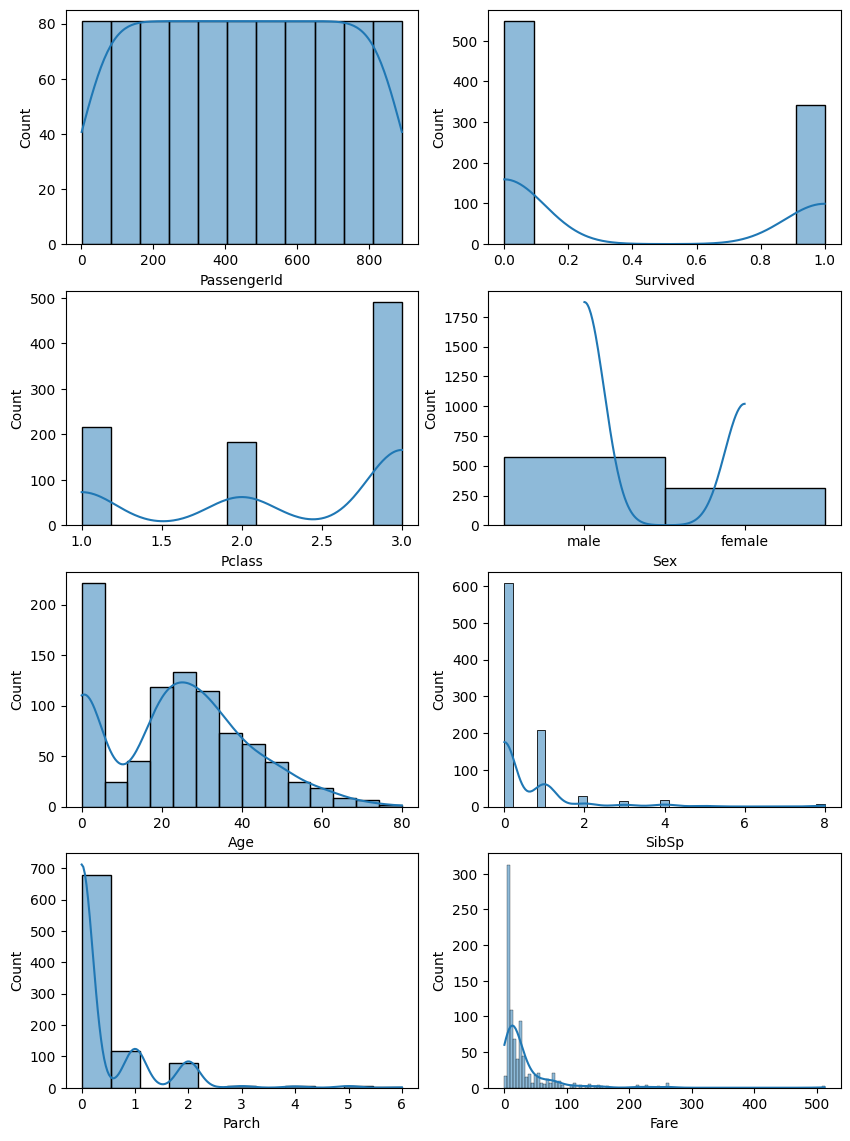

In [15]:

plt.rcParams["figure.figsize"] = (10,14)
#plt.axvline(x=train_data.PassengerId.mean(),color='red')
fig, axes = plt.subplots(4, 2)
sns.histplot(data = train_data, x = 'PassengerId', ax = axes[0,0], kde = True)
sns.histplot(data = train_data, x = 'Survived', ax = axes[0,1], kde = True)
sns.histplot(data = train_data, x = 'Pclass', ax = axes[1,0], kde = True)
sns.histplot(data = train_data, x = 'Sex', ax = axes[1,1], kde = True)
sns.histplot(data = train_data, x = 'Age', ax = axes[2,0], kde = True)
sns.histplot(data = train_data, x = 'SibSp', ax = axes[2,1], kde = True)
sns.histplot(data = train_data, x = 'Parch', ax = axes[3,0], kde = True)
sns.histplot(data = train_data, x = 'Fare', ax = axes[3,1], kde = True)

<Axes: xlabel='Sex', ylabel='Survived'>

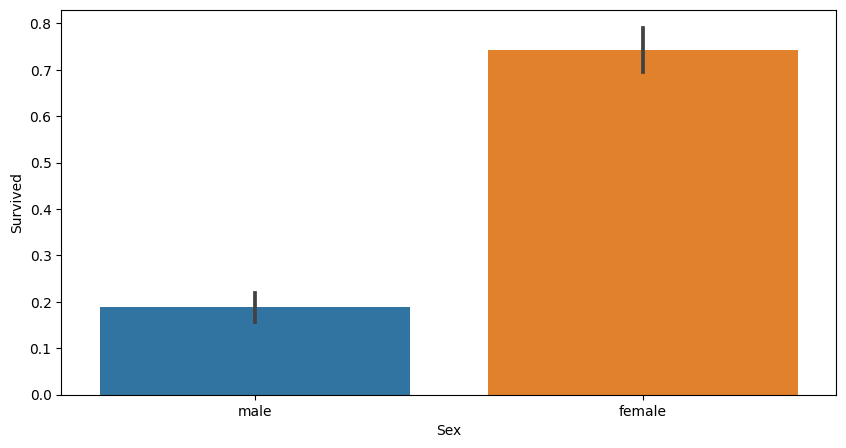

In [16]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(
    x = 'Sex',
    y = 'Survived',
    data = train_data
)

<Axes: xlabel='Pclass', ylabel='Survived'>

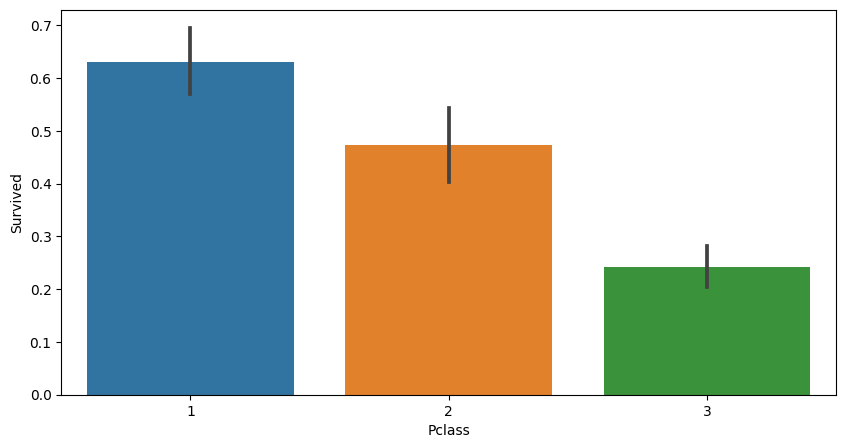

In [17]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(
    x = 'Pclass',
    y = 'Survived',
    data = train_data
)

<Axes: xlabel='Embarked', ylabel='Survived'>

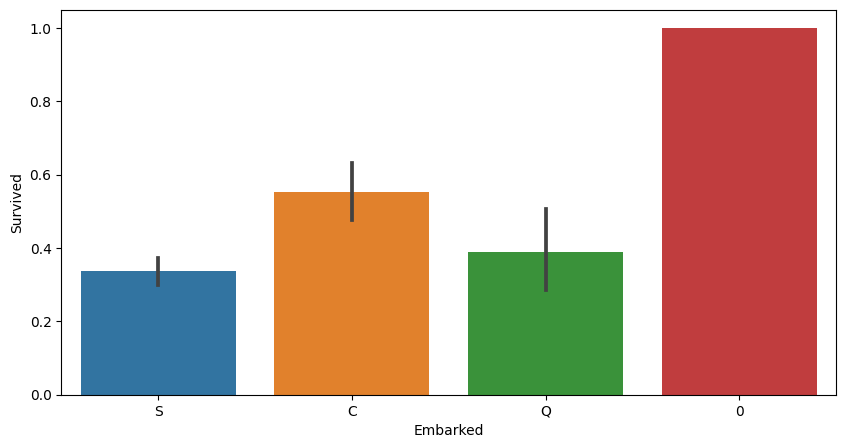

In [18]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(
    x = 'Embarked',
    y = 'Survived',
    data = train_data
)

<Axes: xlabel='Survived', ylabel='Age'>

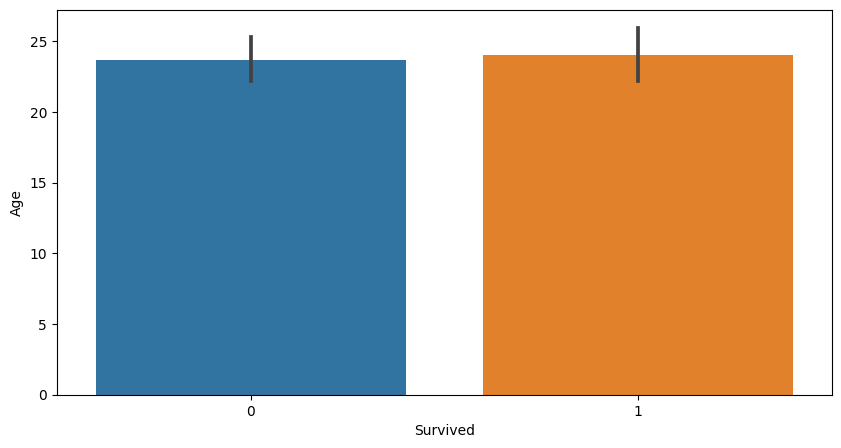

In [19]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(
    x = 'Survived',
    y = 'Age',
    data = train_data
)

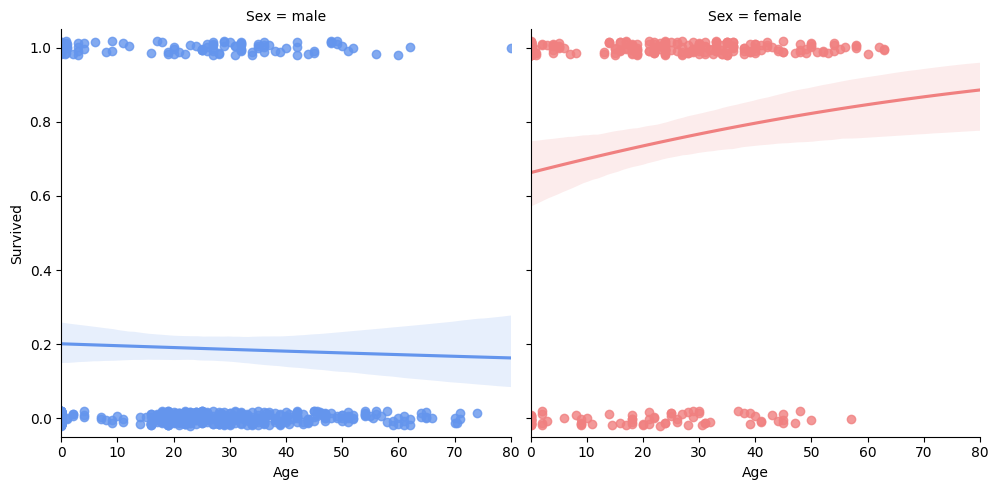

In [20]:

pal = dict(male="#6495ED", female="#F08080")

g = sns.lmplot(x="Age", y="Survived", col="Sex", hue="Sex", data=train_data,
                palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))


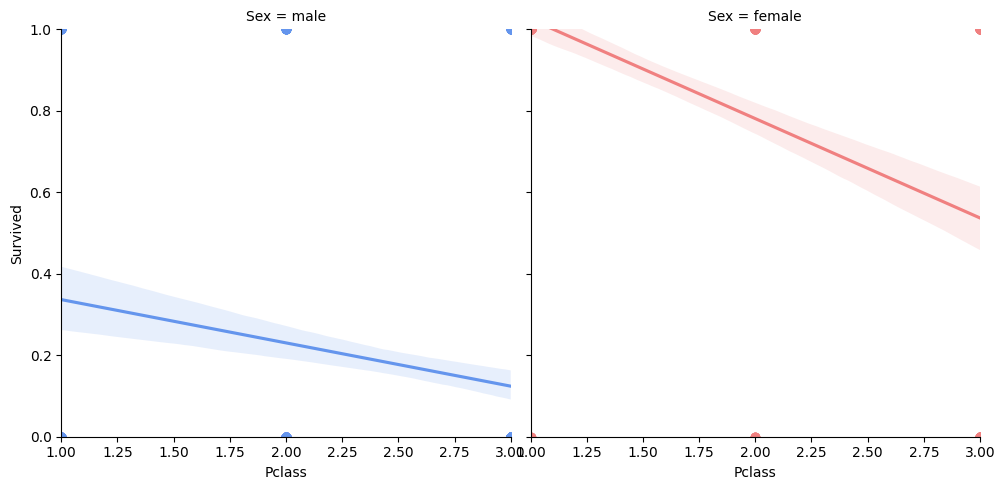

In [21]:
pal = dict(male="#6495ED", female="#F08080")

g = sns.lmplot(x="Pclass", y="Survived", col="Sex", hue="Sex", data=train_data,
                palette=pal)
g.set(xlim=(1, 3), ylim=(0, 1))

La probabilidad de sobrevivencia para los hombres en primera clase esta cercana al 35%, de segunda clase sobrepasa el 20% y para la tercera clase es inferior al 20%.
Con respecto al sexo feminino, la probabiida de supervivencia en la primera clase es cercana al 100%, la segunda clase cercana al 80% y la tercera clase cercana al 60%.
Podemos concluir que la probabilidad mas baja de sobrevivencia en las mujeres, es superior al mejor caso de probabilidad de los hombres.


PROCESAMIENTO DE DATOS DE DATASET - ENTRAMIENTO Y TESTING

In [22]:
# Binarización de varible categoria Sex en Train y Test
train_data['Sex'].replace(['female','male'],[0,1],inplace=True)
test_data['Sex'].replace(['female','male'],[0,1],inplace=True)

In [23]:
#Cambio los datos de embarque en números
train_data['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)
test_data['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)

In [24]:
#Elimino las columnas que considero que no son necesarias para el analisis
train_data = train_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
test_data = test_data.drop(['Name','Ticket','PassengerId','Cabin'], axis=1)

In [25]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.00,1,0,7.25,1
1,1,1,0,38.00,1,0,71.28,2
2,1,3,0,26.00,0,0,7.92,1
3,1,1,0,35.00,1,0,53.10,1
4,0,3,1,35.00,0,0,8.05,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.00,0,0,13.00,1
887,1,1,0,19.00,0,0,30.00,1
888,0,3,0,0.00,1,2,23.45,1
889,1,1,1,26.00,0,0,30.00,2


In [26]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50,0,0,7.83,0
1,3,0,47.00,1,0,7.00,1
2,2,1,62.00,0,0,9.69,0
3,3,1,27.00,0,0,8.66,1
4,3,0,22.00,1,1,12.29,1
...,...,...,...,...,...,...,...
413,3,1,0.00,0,0,8.05,1
414,1,0,39.00,0,0,108.90,2
415,3,1,38.50,0,0,7.25,1
416,3,1,0.00,0,0,8.05,1


In [27]:
#Separo la columna con la información de los sobrevivientes

X_train = train_data.drop(columns = 'Survived')
y_train = train_data['Survived']

In [28]:
X_train_model = train_data.drop(columns = 'Survived')
X_test_model = test_data
y_train_model = train_data['Survived']
y_test_model = data_submission.drop(columns = 'PassengerId')

In [29]:
reg = LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None )
models_lazyClassifier, predictions = reg.fit(X_train_model, X_test_model, y_train_model, y_test_model)
models_lazyClassifier

 31%|███       | 9/29 [00:00<00:00, 22.74it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


100%|██████████| 29/29 [00:01<00:00, 26.61it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.99,0.99,0.99,0.99,0.01
CalibratedClassifierCV,0.99,0.98,0.98,0.99,0.11
RidgeClassifierCV,0.99,0.98,0.98,0.99,0.01
RidgeClassifier,0.99,0.98,0.98,0.99,0.01
LinearSVC,0.98,0.98,0.98,0.98,0.03
LinearDiscriminantAnalysis,0.98,0.98,0.98,0.98,0.02
NuSVC,0.98,0.97,0.97,0.98,0.04
LogisticRegression,0.96,0.96,0.96,0.96,0.02
PassiveAggressiveClassifier,0.94,0.95,0.95,0.94,0.01


Seleccion de modelos, maquinas de soporte vectorial SVC

In [30]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train_model, y_train_model)
Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])
pipe.score(X_test_model, y_test_model)

0.9210526315789473

In [31]:
pipe.fit(X_train_model, y_train_model)
y_hat = pipe.predict(X_test_model)
y_hat[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [32]:
print(classification_report(y_test_model, y_hat))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       266
           1       0.90      0.88      0.89       152

    accuracy                           0.92       418
   macro avg       0.92      0.91      0.91       418
weighted avg       0.92      0.92      0.92       418



In [33]:
from sklearn.linear_model import LogisticRegression
#X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X_train_model, y_train_model)

In [34]:
y_hat_lg = clf.predict(X_test_model)
print(classification_report(y_test_model, y_hat_lg))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       266
           1       0.93      0.96      0.94       152

    accuracy                           0.96       418
   macro avg       0.95      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



In [35]:
from sklearn.ensemble import AdaBoostClassifier
clf_adac = AdaBoostClassifier(n_estimators = 100, random_state = 158)
clf_adac.fit(X_train_model, y_train_model)

AdaBoostClassifier(n_estimators=100, random_state=158)

In [36]:
y_hat_adac = clf_adac.predict(X_test_model)
print(classification_report(y_test_model, y_hat_adac))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       266
           1       0.89      0.91      0.90       152

    accuracy                           0.93       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



>## Prueba de XGBoost
>
>usamos un dataset con las variables mas relevantes para el modelo

In [37]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.00,1,0,7.25,1
1,1,1,0,38.00,1,0,71.28,2
2,1,3,0,26.00,0,0,7.92,1
3,1,1,0,35.00,1,0,53.10,1
4,0,3,1,35.00,0,0,8.05,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.00,0,0,13.00,1
887,1,1,0,19.00,0,0,30.00,1
888,0,3,0,0.00,1,2,23.45,1
889,1,1,1,26.00,0,0,30.00,2


>Separamos matris de atributos de vector objetivo, y luego separamos muestras con train_test_split

In [38]:
X = train_data.drop('Survived', axis = 1)
y = train_data['Survived']

In [39]:
# Verificamos la separacion de la matris de atributos del vector objetivo
X.shape, y.shape

((891, 7), (891,))

In [40]:
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X, y, random_state = 1582)

In [41]:
# Verificamos la separacion de la muestra
X_train_xg.shape, X_test_xg.shape, y_train_xg.shape, y_test_xg.shape

((668, 7), (223, 7), (668,), (223,))

In [42]:
clf_xgb = XGBClassifier()

In [43]:
# Al crear el clasificador podemos ver su listado de hiperparametros, los cuales ajustamos para mejorar el desempeño
clf_xgb.fit(X_train_xg, y_train_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [44]:
XGBClassifier(base_score = 0.5, booster='gbtree', colsample_bylevel = 10,
                colsample_bynode = 1, colsample_bytree = 1, gamma = 10,
                importance_type = 'gain', interaction_constraints='',
                learning_rate=0.025, max_delta_step = 1, max_depth = 100,
                min_child_weight = 1, monotone_constraints = '()',
                n_estimators = 100, n_jobs = -1, num_parallel_tree = 1, random_state = 1582,
                reg_alpha = 0, reg_lambda = 1, scale_pos_weight = 1, subsample = 3,
                tree_method = 'exact', validate_parameters = 1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=10, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=10, gpu_id=None,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.025, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=1,
              max_depth=100, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor=None, random_state=1582, ...)

>Con plot_importance podemos ver en orden, cuales son las variables que el modelo toma mas en cuenta para realizar sus predicciones

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

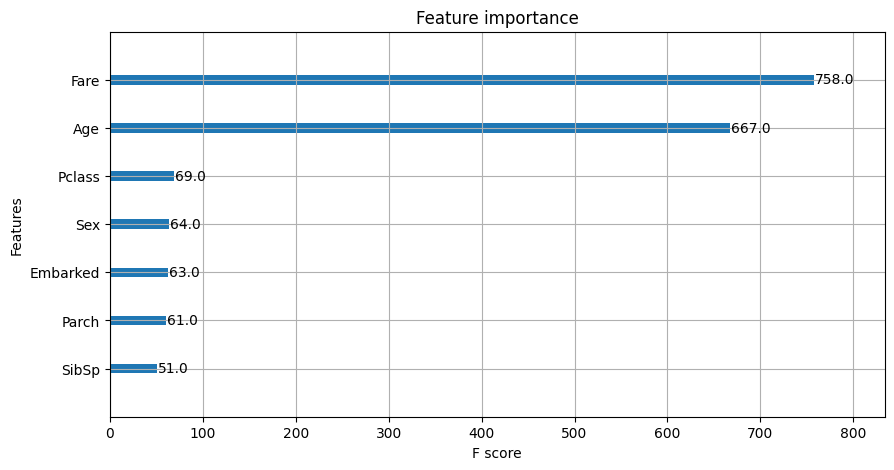

In [45]:
xgb.plot_importance(clf_xgb, ax=plt.gca())

In [55]:
X_test_xg.loc[1]

Pclass      1.00
Sex         0.00
Age        38.00
SibSp       1.00
Parch       0.00
Fare       71.28
Embarked    2.00
Name: 1, dtype: float64

>Segun estas predicciones, podemos observar que el algoritmo indica que la segunda persona del dataset, de sexo femenino no sobrevivio

In [48]:
predictions = clf_xgb.predict(X_test_xg)
predictions[1:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0])

In [56]:
clf_xgb.score(X_train_xg, y_train_xg)

0.9775449101796407

In [57]:
pred_train = clf_xgb.predict(X_train_xg)

>Con la matriz de confusión podemos observar que tanto se equivoca el modelo en el conjunto de entrenamiento, podemos observar que predice que 412 personas mueren y 214 personas sobreviven, y se equivoca bastante poco en ambos casos con 13 errores de predicción de los que mueren y solo 2 predicciones erróneas de los que sobreviven

In [58]:
confusion_matrix(y_train_xg, pred_train)

array([[412,   2],
       [ 13, 241]], dtype=int64)

>Realizamos el mismo procedimiento para validar las predicciones en el conjunto de validación

In [59]:
clf_xgb.score(X_test_xg, y_test_xg)

0.8340807174887892

In [60]:

confusion_matrix(y_test_xg, predictions)

array([[117,  18],
       [ 19,  69]], dtype=int64)